<a href="https://colab.research.google.com/github/yashfirkedata/BitC-Prediction/blob/main/BitC_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BitCoin Price Prediciton**

In [ ]:
!wget https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv

--2024-07-14 17:24:53--  https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159278 (156K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>] 155.54K  --.-KB/s    in 0.1s    

2024-07-14 17:24:54 (1.43 MB/s) - ‘BTC-USD.csv’ saved [159278/159278]



In [ ]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC-USD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # setting Date as out as index
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-13,11813.126953,11841.957031,10908.479492,11392.378906,11392.378906,21042616384
2019-07-14,11381.020508,11451.204102,10234.576172,10256.058594,10256.058594,22486000001
2019-07-15,10257.838867,11052.766602,9992.006836,10895.089844,10895.089844,25384047207
2019-07-16,10896.653320,10996.632813,9448.106445,9477.641602,9477.641602,24151199070
2019-07-17,9471.213867,9963.134766,9163.134766,9693.802734,9693.802734,24569921549


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-07-13 to 2024-07-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


In [ ]:
len(df)

1828

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,56704.597656,58239.195313,56316.875000,58009.226563,58009.226563,27849512607
2024-07-10,58033.882813,59359.433594,57178.414063,57742.496094,57742.496094,26175260526
2024-07-11,57729.890625,59299.433594,57120.378906,57344.914063,57344.914063,28707803842
2024-07-12,57341.195313,58532.554688,56590.175781,57899.464844,57899.464844,25604805221
2024-07-13,57908.738281,58191.808594,57800.246094,58087.300781,58087.300781,22515382272


In [ ]:
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2019-07-13,11392.378906
2019-07-14,10256.058594
2019-07-15,10895.089844
2019-07-16,9477.641602
2019-07-17,9693.802734


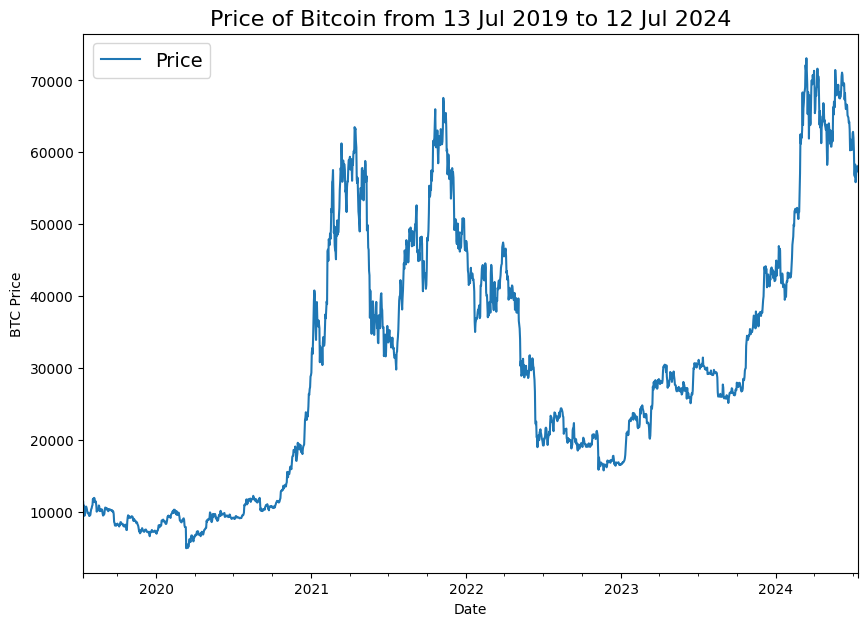

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 13 Jul 2019 to 12 Jul 2024", fontsize=16)
plt.legend(fontsize=14);

## Creating Train and Test Sets

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2019-07-13T00:00:00.000000000', '2019-07-14T00:00:00.000000000',
        '2019-07-15T00:00:00.000000000', '2019-07-16T00:00:00.000000000',
        '2019-07-17T00:00:00.000000000', '2019-07-18T00:00:00.000000000',
        '2019-07-19T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
        '2019-07-21T00:00:00.000000000', '2019-07-22T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([11392.378906, 10256.058594, 10895.089844,  9477.641602,
         9693.802734, 10666.482422, 10530.732422, 10767.139648,
        10599.105469, 10343.106445]))

In [ ]:
from sklearn.model_selection import train_test_split

# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1462, 366, 1462, 366)

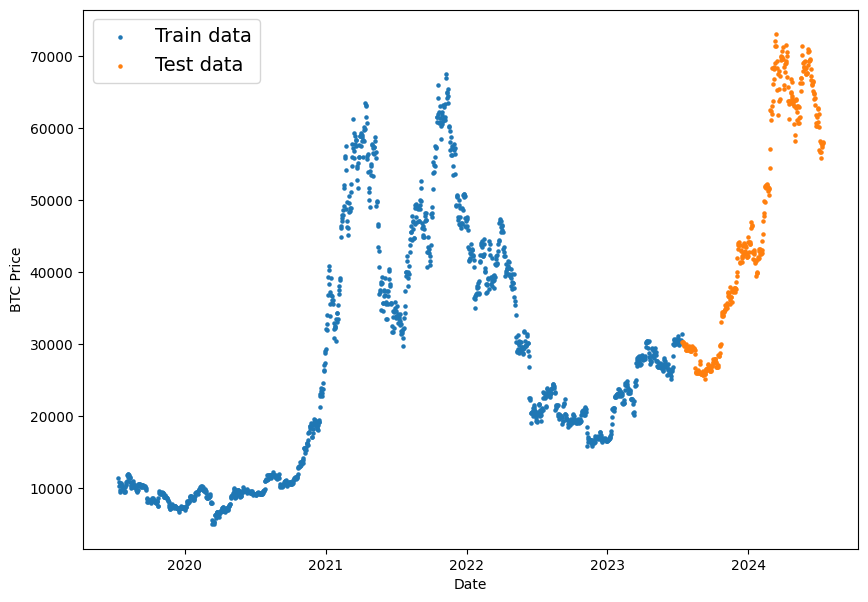

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

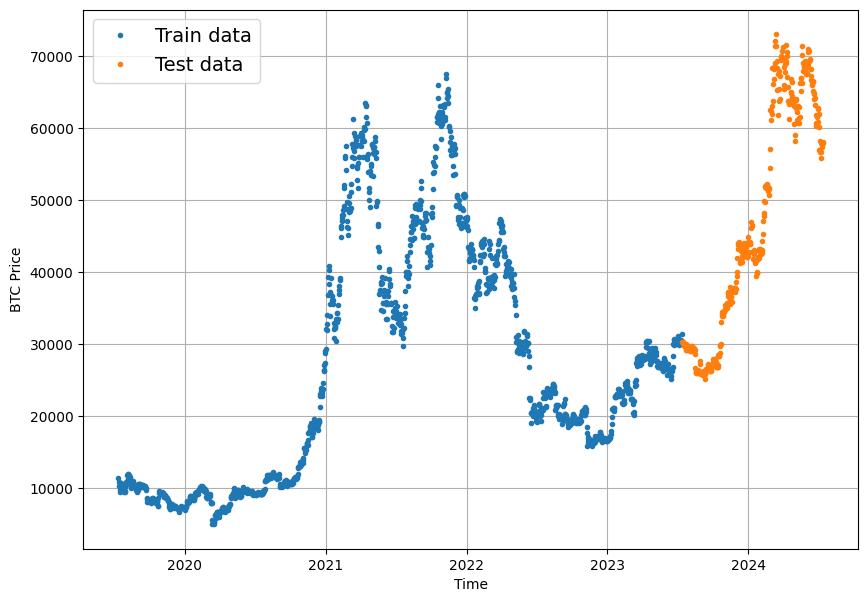

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# **Modelling**

> **horizon** = number of timesteps to predict into future

> **window** = number of timesteps from past used to predict horizon

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

## **Model 0:** Naive Forecast (baseline)

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).

An open system is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in open systems is generally quite poor.

Because of this it will be very hard for us to beat this baseline model.

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([30334.068359, 30295.806641, 30249.132813, 30145.888672,
        29856.5625  , 29913.923828, 29792.015625, 29908.744141,
        29771.802734, 30084.539063]),
 array([60173.921875, 56977.703125, 56662.375   , 58303.539063,
        55849.109375, 56705.097656, 58009.226563, 57742.496094,
        57344.914063, 57899.464844]))

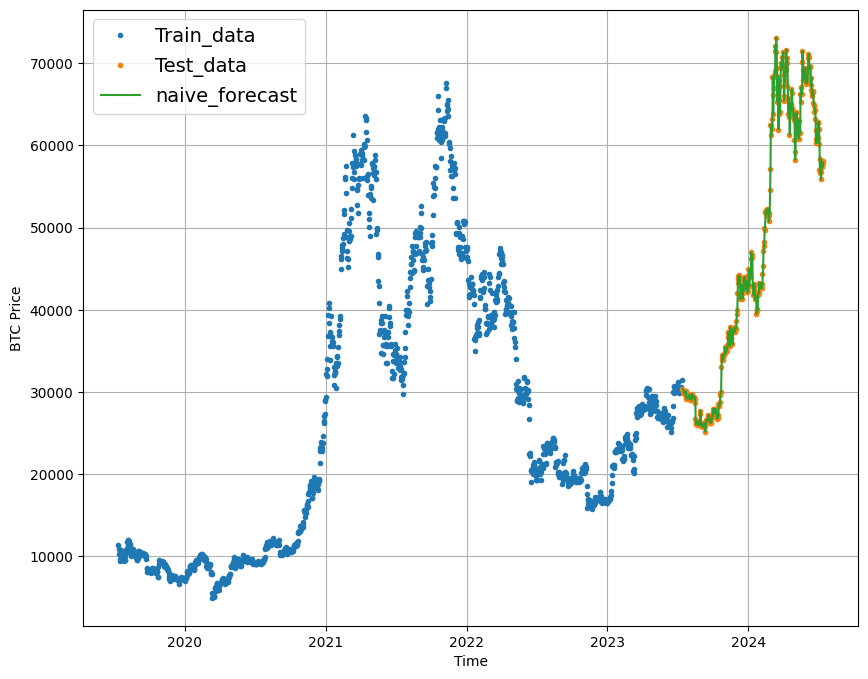

In [ ]:
# Plotting baseline
plt.figure(figsize = (10,8))
plot_time_series(timesteps = X_train, values = y_train, label = "Train_data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test_data")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = "-", label="naive_forecast")

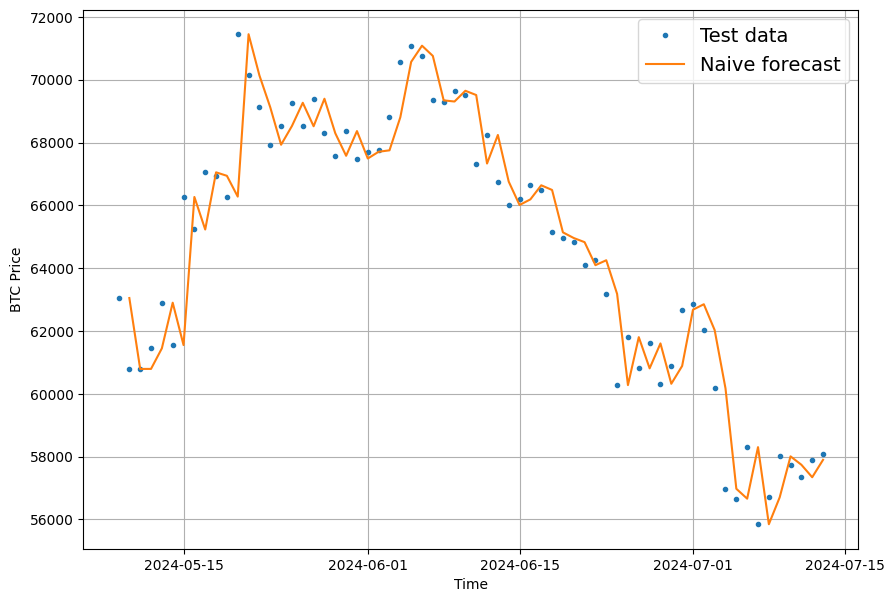

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

We can observe that out naive forecast comes slightly aster the test data. This is because the naive forecast uses the previous timestep value to predict the next timestep value.

### Evaluation

 Mean Absolute Scaled Error (MASE) is a measure for determining the effectiveness of forecasts generated through an algorithm by comparing the predictions with the output of a naïve forecasting approach.

 MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.

In [ ]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true,y_pred))
  mae_naive_no_seasonality = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive_no_seasonality

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results


{'mae': 863.43066,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

### Data Preprocessing

To use the data for our supervised task using Dense and Conv etc.. layers, we need to convert the data in windows => Windowing

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


#### Creating a funtion to make windows utilizing our data

In [ ]:
# Create function to view NumPy arrays as windows
import numpy as np
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # minus 1 to account for 0 indexing
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # Indexing on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1821, 1821)

In [ ]:
for i in range(5):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [11392.378906 10256.058594 10895.089844  9477.641602  9693.802734
 10666.482422 10530.732422] -> Label: [10767.139648]
Window: [10256.058594 10895.089844  9477.641602  9693.802734 10666.482422
 10530.732422 10767.139648] -> Label: [10599.105469]
Window: [10895.089844  9477.641602  9693.802734 10666.482422 10530.732422
 10767.139648 10599.105469] -> Label: [10343.106445]
Window: [ 9477.641602  9693.802734 10666.482422 10530.732422 10767.139648
 10599.105469 10343.106445] -> Label: [9900.767578]
Window: [ 9693.802734 10666.482422 10530.732422 10767.139648 10599.105469
 10343.106445  9900.767578] -> Label: [9811.925781]


In [ ]:
# View the last 3 windows/labels
for i in range(5):
  print(f"Window: {full_windows[i-5]} -> Label: {full_labels[i-5]}")

Window: [62029.015625 60173.921875 56977.703125 56662.375    58303.539063
 55849.109375 56705.097656] -> Label: [58009.226563]
Window: [60173.921875 56977.703125 56662.375    58303.539063 55849.109375
 56705.097656 58009.226563] -> Label: [57742.496094]
Window: [56977.703125 56662.375    58303.539063 55849.109375 56705.097656
 58009.226563 57742.496094] -> Label: [57344.914063]
Window: [56662.375    58303.539063 55849.109375 56705.097656 58009.226563
 57742.496094 57344.914063] -> Label: [57899.464844]
Window: [58303.539063 55849.109375 56705.097656 58009.226563 57742.496094
 57344.914063 57899.464844] -> Label: [58087.300781]


Similarly can be implemented using `tf.keras.preprocessing.timeseries_dataset_from_array()`.

It returns data in form of tf.data.Dataset instance => faster processing

### Turning windows into training and test sets

In [ ]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1456, 365, 1456, 365)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[11392.378906, 10256.058594, 10895.089844,  9477.641602,
          9693.802734, 10666.482422, 10530.732422],
        [10256.058594, 10895.089844,  9477.641602,  9693.802734,
         10666.482422, 10530.732422, 10767.139648],
        [10895.089844,  9477.641602,  9693.802734, 10666.482422,
         10530.732422, 10767.139648, 10599.105469],
        [ 9477.641602,  9693.802734, 10666.482422, 10530.732422,
         10767.139648, 10599.105469, 10343.106445],
        [ 9693.802734, 10666.482422, 10530.732422, 10767.139648,
         10599.105469, 10343.106445,  9900.767578]]),
 array([[10767.139648],
        [10599.105469],
        [10343.106445],
        [ 9900.767578],
        [ 9811.925781]]))

### Setting up Model Checkpoint

In [ ]:
import os
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)


## **Model 1:** Dense Model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(126, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") # linear is same as having no activation
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

In [ ]:
model_1.fit(x= train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
12/12 [==============================] - 2s 58ms/step - loss: 20908.1445 - mae: 20908.1445 - val_loss: 13453.7783 - val_mae: 13453.7764
Epoch 2/100
12/12 [==============================] - 0s 35ms/step - loss: 4226.8232 - mae: 4226.8232 - val_loss: 8089.5190 - val_mae: 8089.5190
Epoch 3/100
12/12 [==============================] - 0s 37ms/step - loss: 2694.0283 - mae: 2694.0283 - val_loss: 4191.6016 - val_mae: 4191.6016
Epoch 4/100
12/12 [==============================] - 0s 33ms/step - loss: 1728.0991 - mae: 1728.0991 - val_loss: 2030.2042 - val_mae: 2030.2042
Epoch 5/100
12/12 [==============================] - 0s 36ms/step - loss: 1440.3677 - mae: 1440.3677 - val_loss: 1766.2450 - val_mae: 1766.2450
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1415.6213 - mae: 1415.6213 - val_loss: 1850.0667 - val_mae: 1850.0664
Epoch 7/100
12/12 [==============================] - 1s 48ms/step - loss: 1383.2557 - mae: 1383.2557 - val_loss: 1699.2172 - val_mae:

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 4ms/step - loss: 878.6186 - mae: 878.6186


[878.6185913085938, 878.6185913085938]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 871.4197 - mae: 871.4197


[871.419677734375, 871.419677734375]

So our best model_1 is off by 870 MAE

### Making forecast with model (on test data)

In [ ]:
def make_preds(model,input_data):
  """
  Used to make predictions on input data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)


In [ ]:
model_1_preds = make_preds(model_1, test_windows)

12/12 [==============================] - 0s 2ms/step


In [ ]:
len(model_1_preds), model_1_preds[:10]

(365,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([30657.13 , 30282.533, 30469.871, 30131.516, 29825.06 , 29985.4  ,
        29846.79 , 29868.39 , 29828.48 , 30042.232], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 871.4197,
 'mse': 1814182.4,
 'rmse': 1346.9159,
 'mape': 1.7377416,
 'mase': 54.139793}

In [ ]:
naive_results

{'mae': 863.43066,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

Our Model_1 is close to beat our naive_model.

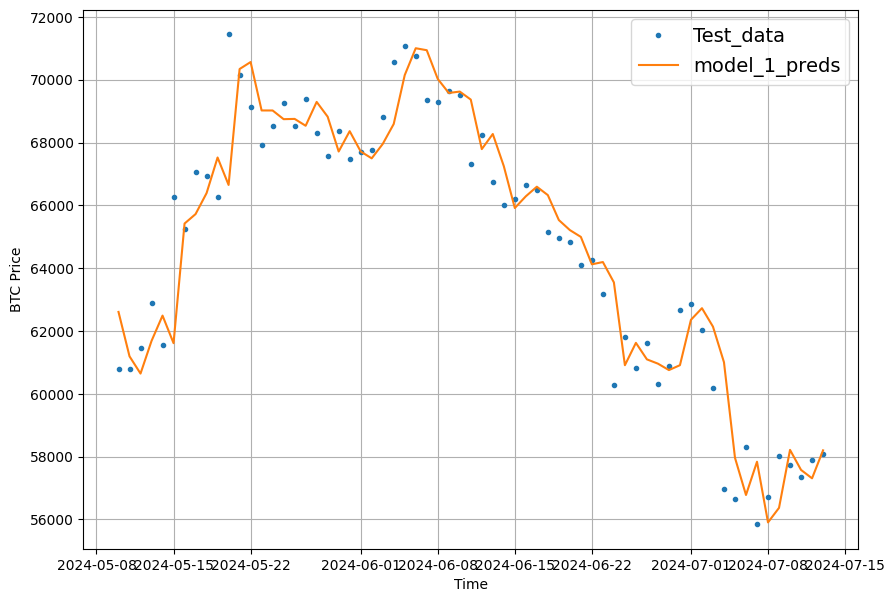

In [ ]:
# plotting
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## **Model 2:** Dense Model (window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1798, 1798)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1438, 360, 1438, 360)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 1631.8060


1631.8060302734375

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 935.2975


935.2975463867188

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

12/12 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 935.29755,
 'mse': 2020247.1,
 'rmse': 1421.354,
 'mape': 1.8869238,
 'mase': 53.767105}

In [ ]:
naive_results

{'mae': 863.43066,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

Our Model performs worse than out Naive model in almost all metrics.

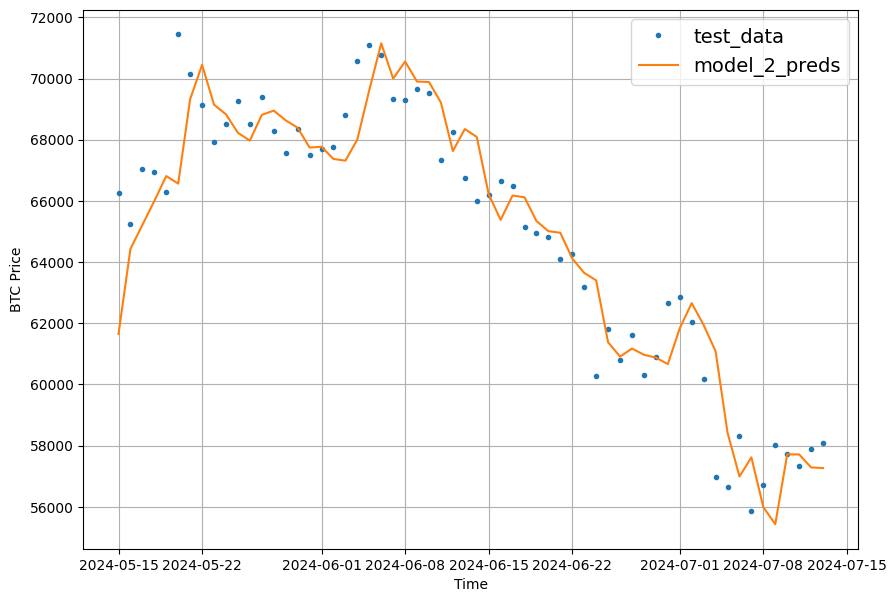

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## **Model 3:** Dense Model (window = 30, horizon = 7)

In this model, we will try to predict 7 days ahead using data of previous 30 days.

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1792, 1792)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1433, 359, 1433, 359)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 1884.3113


1884.311279296875

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 1809.3402


1809.3402099609375

We can see that the error is too high compared to previous models. THis is because we are predicting more and more in the future. Generally dekha jaaye to its difficult to predict further in the future.

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

12/12 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[31081.695, 30489.9  , 30856.396, 31194.23 , 31388.012, 31172.82 ,
        31013.371],
       [30754.756, 30775.521, 30592.35 , 31205.248, 31476.594, 30732.742,
        30989.395],
       [30565.846, 30523.17 , 30280.28 , 30529.742, 30798.342, 30131.547,
        30755.807],
       [30182.703, 30160.816, 30235.635, 30360.902, 30437.236, 30081.775,
        30585.395],
       [30006.752, 29193.385, 29883.855, 29948.088, 30349.246, 29887.281,
        30138.342]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([1004.90735,  984.0765 ,  587.32227,  506.49805,  396.9509 ,
         414.75027,  397.5695 ,  585.1671 ,  390.44028,  533.5318 ,
         230.60938,  271.738  ,  236.52762,  310.06445,  416.71484,
         324.41406,  262.00418,  241.64983,  200.98856,  271.36996,
         262.56223,  319.26758,  508.90152,  657.9972 ,  657.0703 ,
         293.61383,  235.80971,  596.3368 ,  959.6429 , 1426.1476 ,
        1768.5862 , 2157.4343 , 2439.511  , 2560.2144 , 1517.6478 ,
         667.52374,  183.93275,  138.17578,  363.43832,  678.8273 ,
         626.8792 ,  671.8468 ,  648.7062 ,  649.8686 ,  657.2642 ,
         777.48047,  378.868  ,  727.13837,  558.42773,  428.68863,
         337.84653,  129.26674,  252.32869,  413.14676,  604.45844,
         449.16824,  616.9554 ,  650.0374 ,  923.7676 , 1303.4662 ,
        1530.2188 , 1387.3287 , 1063.9286 ,  653.4576 ,  316.6328 ,
         356.947  ,  335.21988,  296.90543,  542.0985 ,  395.52512,
         370.20786,  272.11273,  665.1116

We are getting multi dimensional output. This is because preddictions are getting evaluated across the horizon i.e 7 predictions at a time,
so we need to reduce_mean.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1809.3402,
 'mse': 6867566.5,
 'rmse': 2073.5437,
 'mape': 3.6990337,
 'mase': 53.600132}

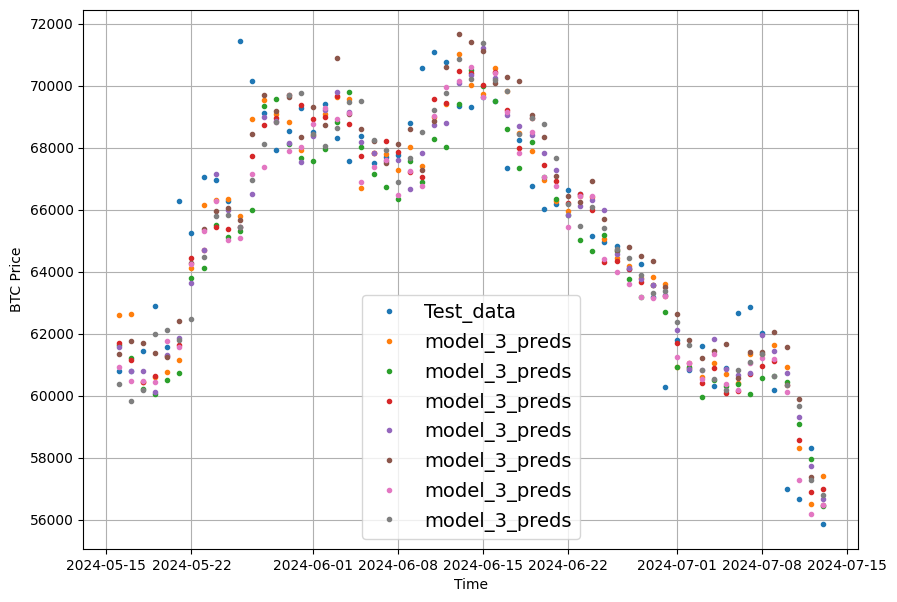

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

As our predictions are  multidimensional , our graph is kind of useless. We need to bring it to 1D.

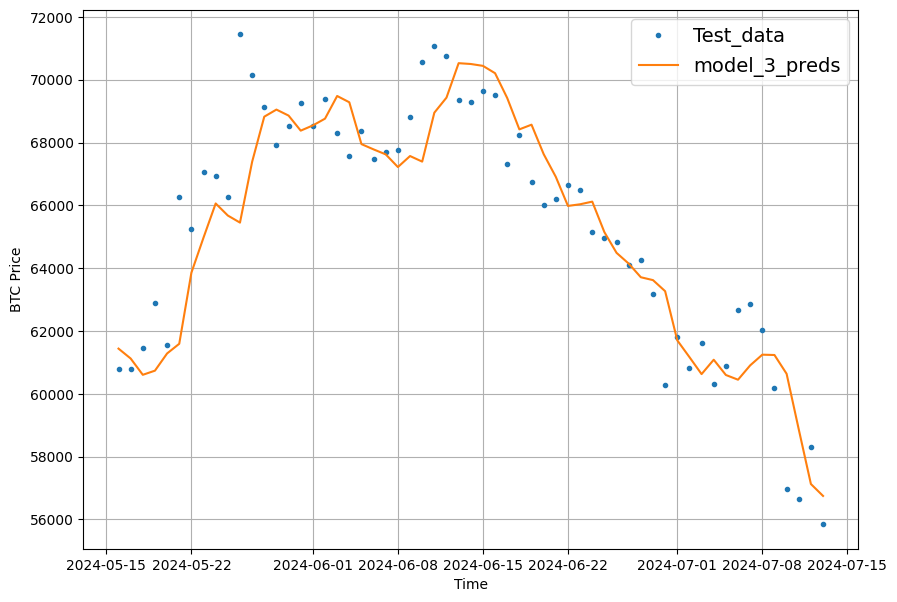

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

Using reduce_mean may lose the information as we have made predictions fot the 7 days are averaging them is not right, but it helps us plot the graph so we did it.

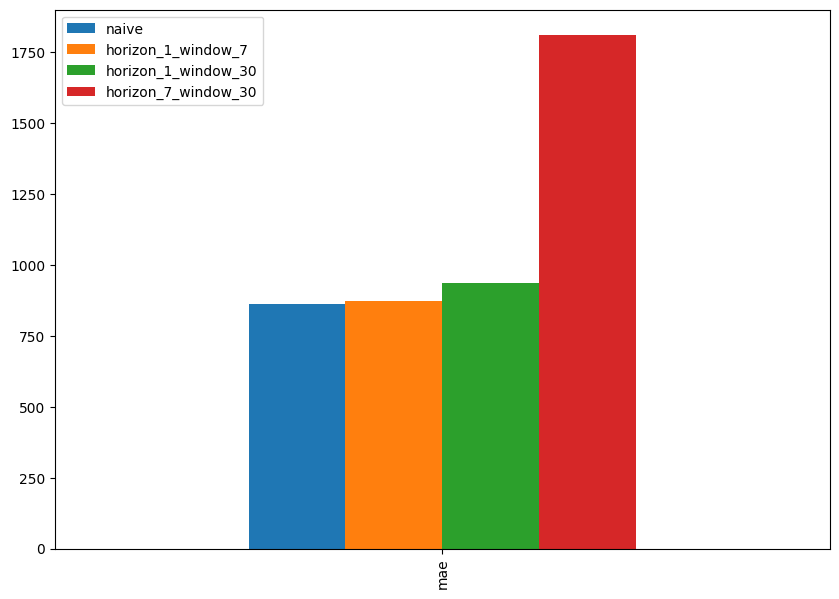

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
naive_results["mae"], model_1_results["mae"]

(863.43066, 871.4197)

In [ ]:
print(pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]},index = ["mae"]))

          naive  horizon_1_window_7  horizon_1_window_30  horizon_7_window_30
mae  863.430664          871.419678           935.297546           1809.34021


> Imp point: The naive model is performing so good because of the presence of Autocorrelation in the data.  If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value.  

## **Model 4:** Conv1D

As this is a sequence to sequence model, we can use Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1821, 1821)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1456, 365, 1456, 365)

In [ ]:
train_windows.shape

(1456, 7)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[11392.379]
 [10256.059]
 [10895.09 ]
 [ 9477.642]
 [ 9693.803]
 [10666.482]
 [10530.732]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  # creating a lambda layer to preprocess inputs else u will encounter shape eroor.
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
12/12 [==============================] - 3s 67ms/step - loss: 13637.2021 - val_loss: 7237.8574
Epoch 2/100
12/12 [==============================] - 0s 44ms/step - loss: 2810.2778 - val_loss: 4640.3911
Epoch 3/100
12/12 [==============================] - 1s 71ms/step - loss: 1755.9198 - val_loss: 2459.1597
Epoch 4/100
12/12 [==============================] - 0s 45ms/step - loss: 1250.1893 - val_loss: 1445.2339
Epoch 5/100
12/12 [==============================] - 0s 45ms/step - loss: 1148.4257 - val_loss: 1393.0472
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 1132.2354 - val_loss: 1428.0225
Epoch 7/100
12/12 [==============================] - 0s 42ms/step - loss: 1112.2710 - val_loss: 1331.7350
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 1104.9585 - val_loss: 1332.7186
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 1099.4626 - val_loss: 1359.3622
Epoch 10/100
12/12 [============================

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 7ms/step - loss: 878.2784


878.2784423828125

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

12/12 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30834.412, 30503.193, 30391.025, 30210.783, 30037.387, 29963.303,
       29902.828, 29940.463, 29902.127, 30066.385], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 878.2783,
 'mse': 1866335.0,
 'rmse': 1366.1387,
 'mape': 1.7660476,
 'mase': 54.139793}

In [ ]:
naive_results

{'mae': 863.43066,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

Our Conv1D model is still off from out baseline model.

## **Model 5:** RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

# building an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu")(x) # we didnt use default tanh because tanh activation can saturate with large input values, leading to vanishing gradients and ineffective learning.
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
12/12 [==============================] - 5s 208ms/step - loss: 26064.0742 - val_loss: 41041.1992
Epoch 2/100
12/12 [==============================] - 1s 130ms/step - loss: 20121.9102 - val_loss: 29062.3555
Epoch 3/100
12/12 [==============================] - 1s 130ms/step - loss: 12349.6914 - val_loss: 11666.6221
Epoch 4/100
12/12 [==============================] - 1s 132ms/step - loss: 3115.4541 - val_loss: 5737.9731
Epoch 5/100
12/12 [==============================] - 1s 127ms/step - loss: 2011.8024 - val_loss: 3221.8811
Epoch 6/100
12/12 [==============================] - 2s 165ms/step - loss: 1489.1428 - val_loss: 1802.2385
Epoch 7/100
12/12 [==============================] - 2s 148ms/step - loss: 1224.5984 - val_loss: 1443.3275
Epoch 8/100
12/12 [==============================] - 0s 10ms/step - loss: 1174.1672 - val_loss: 1500.8597
Epoch 9/100
12/12 [==============================] - 0s 10ms/step - loss: 1183.7590 - val_loss: 1477.7543
Epoch 10/100
12/12 [=============

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 4ms/step - loss: 902.1913


902.1913452148438

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

12/12 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30891.328, 30450.275, 30266.748, 30201.453, 30037.875, 29866.98 ,
       29857.084, 29884.008, 29855.602, 29977.717], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 902.19135,
 'mse': 1951982.5,
 'rmse': 1397.1337,
 'mape': 1.811246,
 'mase': 54.139793}

It seems even with an LSTM-powered RNN we weren't able to beat our naive models results.

### Make a multivariate time series

In [ ]:
bitcoin_prices.head()

,Price
Date,
2019-07-13,11392.378906
2019-07-14,10256.058594
2019-07-15,10895.089844
2019-07-16,9477.641602
2019-07-17,9693.802734


We will add new feature.

**Bitcoin Halving**: i.e ```The term "halving" as it relates to Bitcoin concerns how many tokens are rewarded—the amount is cut in half.```

We will be adding new column named Bitcoin block reward size # search it up on the internet

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

above link suggests that bitcoin halving occurs every 4 yrs.

```
Block Reward	Start Date
50	          3 January 2009 (2009-01-03)
25	          28 November 2012
12.5	        9 July 2016
6.25	        11 May 2020
3.125	        19 Apr 2024
```
Incorporating this information in our data.

In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
block_reward_5 = 3.125 # 19 Apr 2024

# Block reward dates (datetime form of the above date stamps)
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")
block_reward_5_datetime = np.datetime64("2024-04-19")

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_4_days = (block_reward_5_datetime - bitcoin_prices.index[0]).days
block_reward_3_days, block_reward_4_days

(303, 1742)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:block_reward_4_days, -1] = block_reward_4
bitcoin_prices_block.iloc[block_reward_4_days:, -1] = block_reward_5
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2019-07-13,11392.378906,12.5
2019-07-14,10256.058594,12.5
2019-07-15,10895.089844,12.5
2019-07-16,9477.641602,12.5
2019-07-17,9693.802734,12.5


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2024-07-09,58009.226563,3.125
2024-07-10,57742.496094,3.125
2024-07-11,57344.914063,3.125
2024-07-12,57899.464844,3.125
2024-07-13,58087.300781,3.125


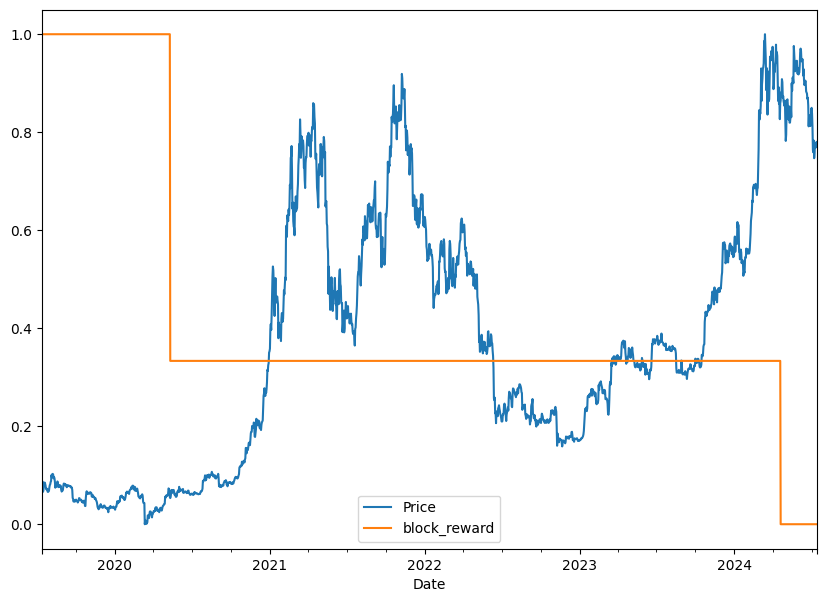

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

### Making a windowed dataset
We can create windows inside dataset itself using `pandas.DataFrame.shift()`

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2019-07-13,11392.378906,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14,10256.058594,12.5,11392.378906,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-15,10895.089844,12.5,10256.058594,11392.378906,NaN,NaN,NaN,NaN,NaN
2019-07-16,9477.641602,12.5,10895.089844,10256.058594,11392.378906,NaN,NaN,NaN,NaN
2019-07-17,9693.802734,12.5,9477.641602,10895.089844,10256.058594,11392.378906,NaN,NaN,NaN
2019-07-18,10666.482422,12.5,9693.802734,9477.641602,10895.089844,10256.058594,11392.378906,NaN,NaN
2019-07-19,10530.732422,12.5,10666.482422,9693.802734,9477.641602,10895.089844,10256.058594,11392.378906,NaN
2019-07-20,10767.139648,12.5,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844,10256.058594,11392.378906
2019-07-21,10599.105469,12.5,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844,10256.058594


You can see that the price is basically the horizon and the Price+1 -> Price + 7 is our Window

In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2019-07-20,12.5,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844,10256.058594,11392.378906
2019-07-21,12.5,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844,10256.058594
2019-07-22,12.5,10599.105469,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844
2019-07-23,12.5,10343.106445,10599.105469,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602
2019-07-24,12.5,9900.767578,10343.106445,10599.105469,10767.139648,10530.732422,10666.482422,9693.802734


In [ ]:
# View labels
y.head()

Date
2019-07-20    10767.139648
2019-07-21    10599.105469
2019-07-22    10343.106445
2019-07-23     9900.767578
2019-07-24     9811.925781
Name: Price, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1456, 1456, 365, 365)

## **Model 6:** Dense Model (Multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
12/12 [==============================] - 2s 50ms/step - loss: 8257.6309 - val_loss: 4340.8506
Epoch 2/100
12/12 [==============================] - 0s 34ms/step - loss: 2722.7625 - val_loss: 2636.4739
Epoch 3/100
12/12 [==============================] - 0s 33ms/step - loss: 1583.1705 - val_loss: 2185.0161
Epoch 4/100
12/12 [==============================] - 0s 34ms/step - loss: 1403.9666 - val_loss: 1492.3835
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1226.8550 - val_loss: 1512.2888
Epoch 6/100
12/12 [==============================] - 0s 32ms/step - loss: 1149.4073 - val_loss: 1444.3184
Epoch 7/100
12/12 [==============================] - 0s 36ms/step - loss: 1123.1821 - val_loss: 1380.1266
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 1082.1182 - val_loss: 1461.8468
Epoch 9/100
12/12 [==============================] - 0s 31ms/step - loss: 1040.5999 - val_loss: 1262.9491
Epoch 10/100
12/12 [============================

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 847.2446


847.24462890625

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

12/12 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30588.967, 30319.924, 30324.62 , 30119.756, 29966.527, 29839.525,
       29816.846, 29877.191, 29803.146, 30012.783], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 847.2446,
 'mse': 1795406.8,
 'rmse': 1339.9279,
 'mape': 1.6813796,
 'mase': 54.139793}

In [ ]:
naive_results

{'mae': 863.43066,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

We can see our Multivariate time series is better in almost every metric than out baseline model which was the best one till now.

## **Model 7:** N-BEATS algorithm

We will be implementing the following algorithm on our data
https://arxiv.org/pdf/1905.10437

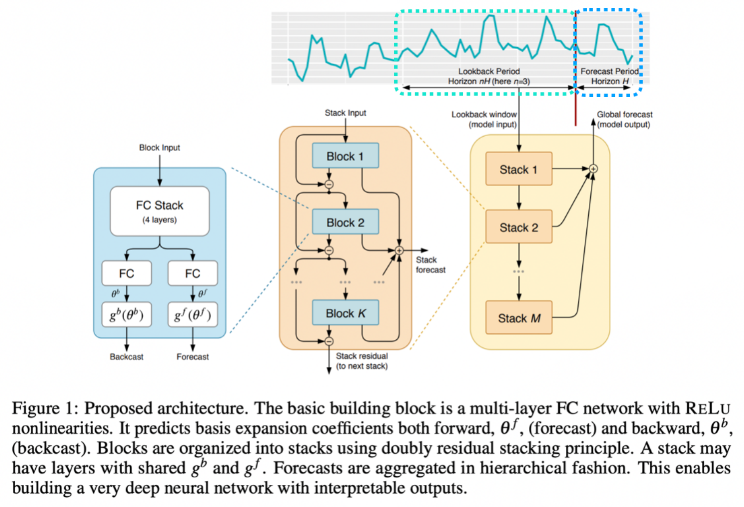

Using the same hyperparameters as the paper which can be found in Appendix D of the N-BEATS paper

#### Building and testing an N-BEATS block layer

Building an N-BEATS block layer

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):  # keyword argument takes care of all of the arguments for the parent class (input_shape, trainable, name)

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Setting up the NBeatsBlock custom layer we see:

- The class inherits from tf.keras.layers.Layer (this gives it all of the methods assosciated with tf.keras.layers.Layer)
- The constructor (def __init__(...)) takes all of the layer hyperparameters as well as the **kwargs argument
  - The **kwargs argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, input_shape, trainable and name


In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.24054372  0.2420147  -0.06830389 -0.3593818   0.00450006  0.58430827
 -0.47918642]
Forecast: -0.13207048177719116


### Preparing data for the N-BEATS algorithm using `tf.data`

In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2019-07-13,11392.378906
2019-07-14,10256.058594
2019-07-15,10895.089844
2019-07-16,9477.641602
2019-07-17,9693.802734


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2019-07-20,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844,10256.058594,11392.378906
2019-07-21,10599.105469,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844,10256.058594
2019-07-22,10343.106445,10599.105469,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602,10895.089844
2019-07-23,9900.767578,10343.106445,10599.105469,10767.139648,10530.732422,10666.482422,9693.802734,9477.641602
2019-07-24,9811.925781,9900.767578,10343.106445,10599.105469,10767.139648,10530.732422,10666.482422,9693.802734


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1456, 1456, 365, 365)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparams for N-BEATS algorithm

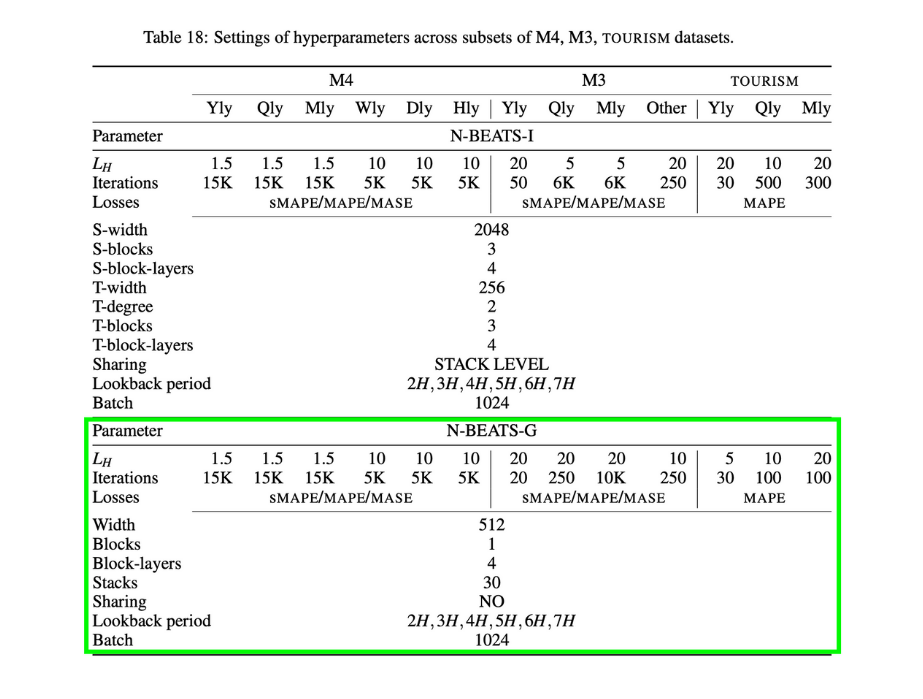

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

#### Getting ready for residual connections

Before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS double residual stacking (section 3.2 of the N-BEATS paper) possible:

- tf.keras.layers.subtract(inputs) - subtracts list of input tensors from each other
- tf.keras.layers.add(inputs) - adds list of input tensors to each other

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


A residual connection (also called skip connections) involves a deeper neural network layer receiving the outputs as well as the inputs of a shallower neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:

- Subtract the backcast outputs from a previous block from the backcast inputs to the current block
- Add the forecast outputs from all blocks together in a stack

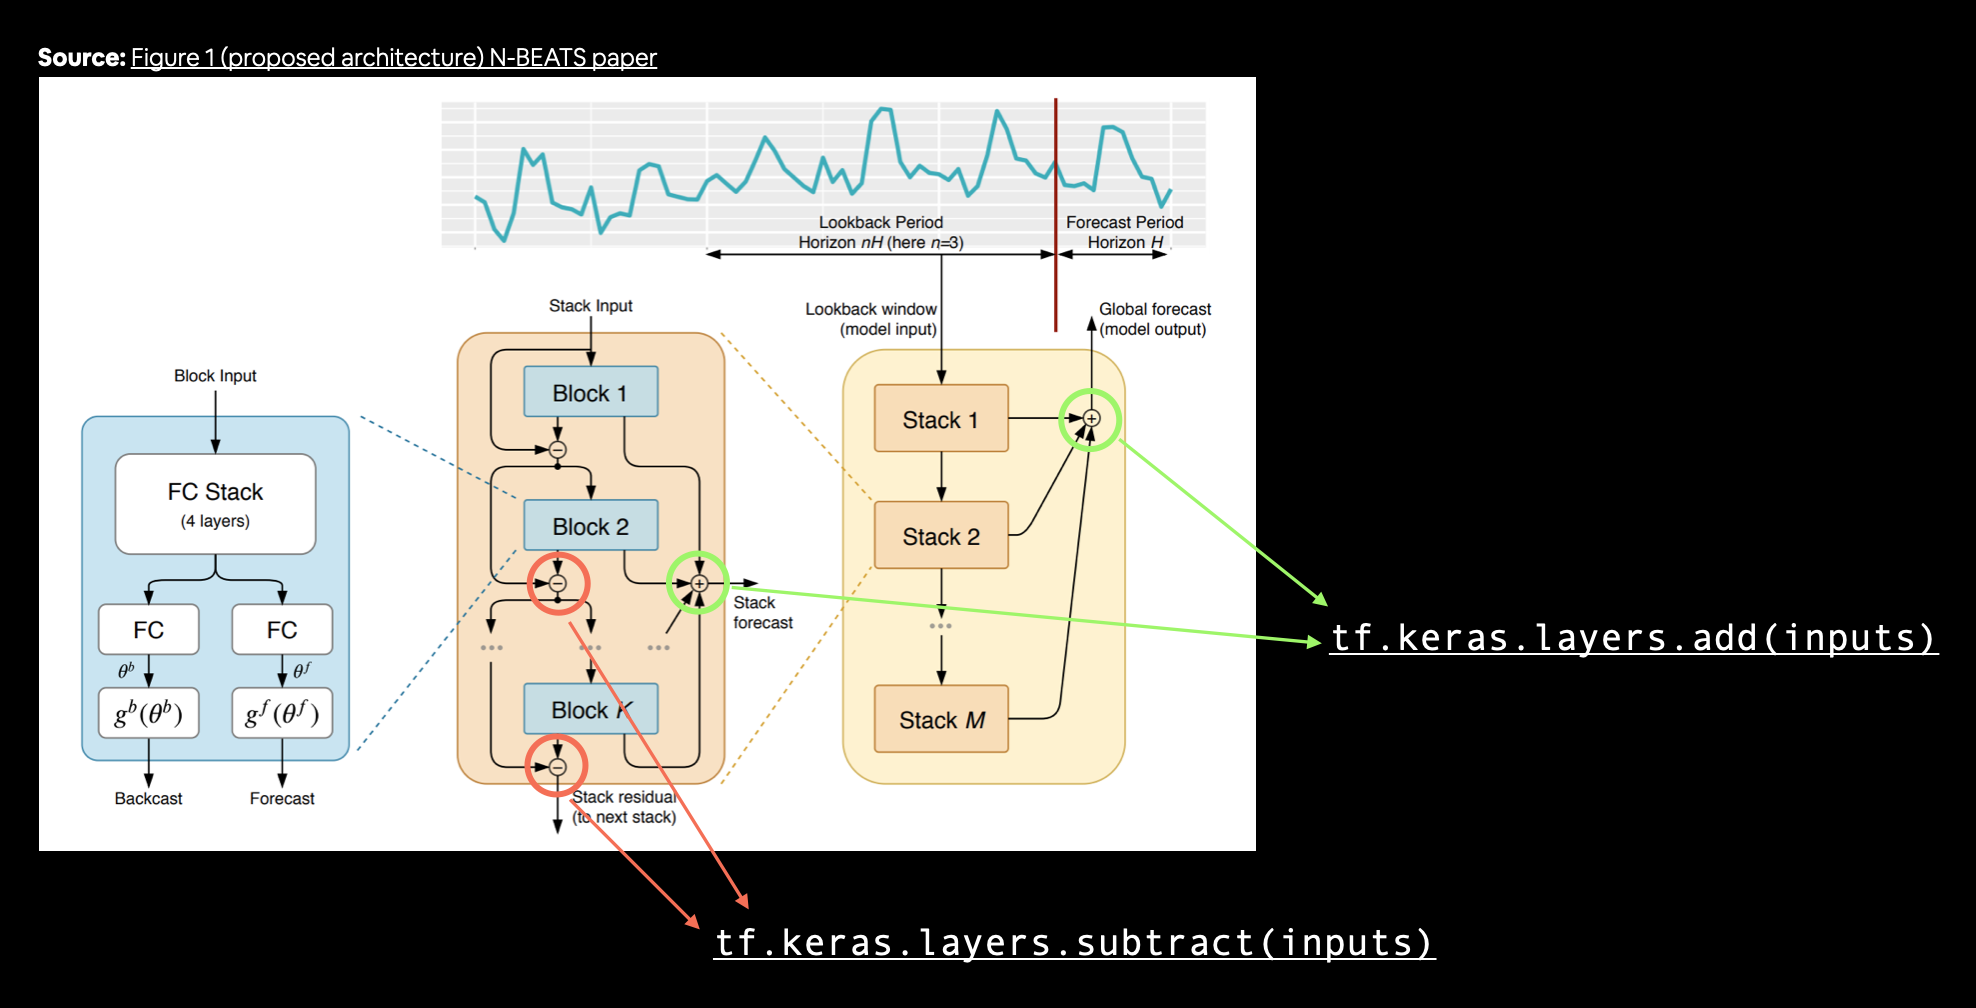

#### Building our N_BEATS algorithm

In [115]:
 %%time
import tensorflow as tf
tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 144: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 245: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 345: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 1min 30s, sys: 2.26 s, total: 1min 32s
Wall time: 1min 40s


In [116]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 53ms/step - loss: 847.6169 - mae: 847.6169 - mse: 1795704.5000


[847.616943359375, 847.616943359375, 1795704.5]

In [117]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 5s 5s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30437.832, 30309.719, 30266.434, 30236.12 , 30017.305, 30052.69 ,
       29852.35 , 29942.016, 29807.613, 30056.615], dtype=float32)>

In [118]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 847.61694,
 'mse': 1795704.5,
 'rmse': 1340.039,
 'mape': 1.6788008,
 'mase': 54.139793}

In [119]:
model_6_results

{'mae': 847.2446,
 'mse': 1795406.8,
 'rmse': 1339.9279,
 'mape': 1.6813796,
 'mase': 54.139793}

It seems that out N-BEATS model is slightly outperformed by our Model_6,

#### Plotting the N-BEATS architecture we've created

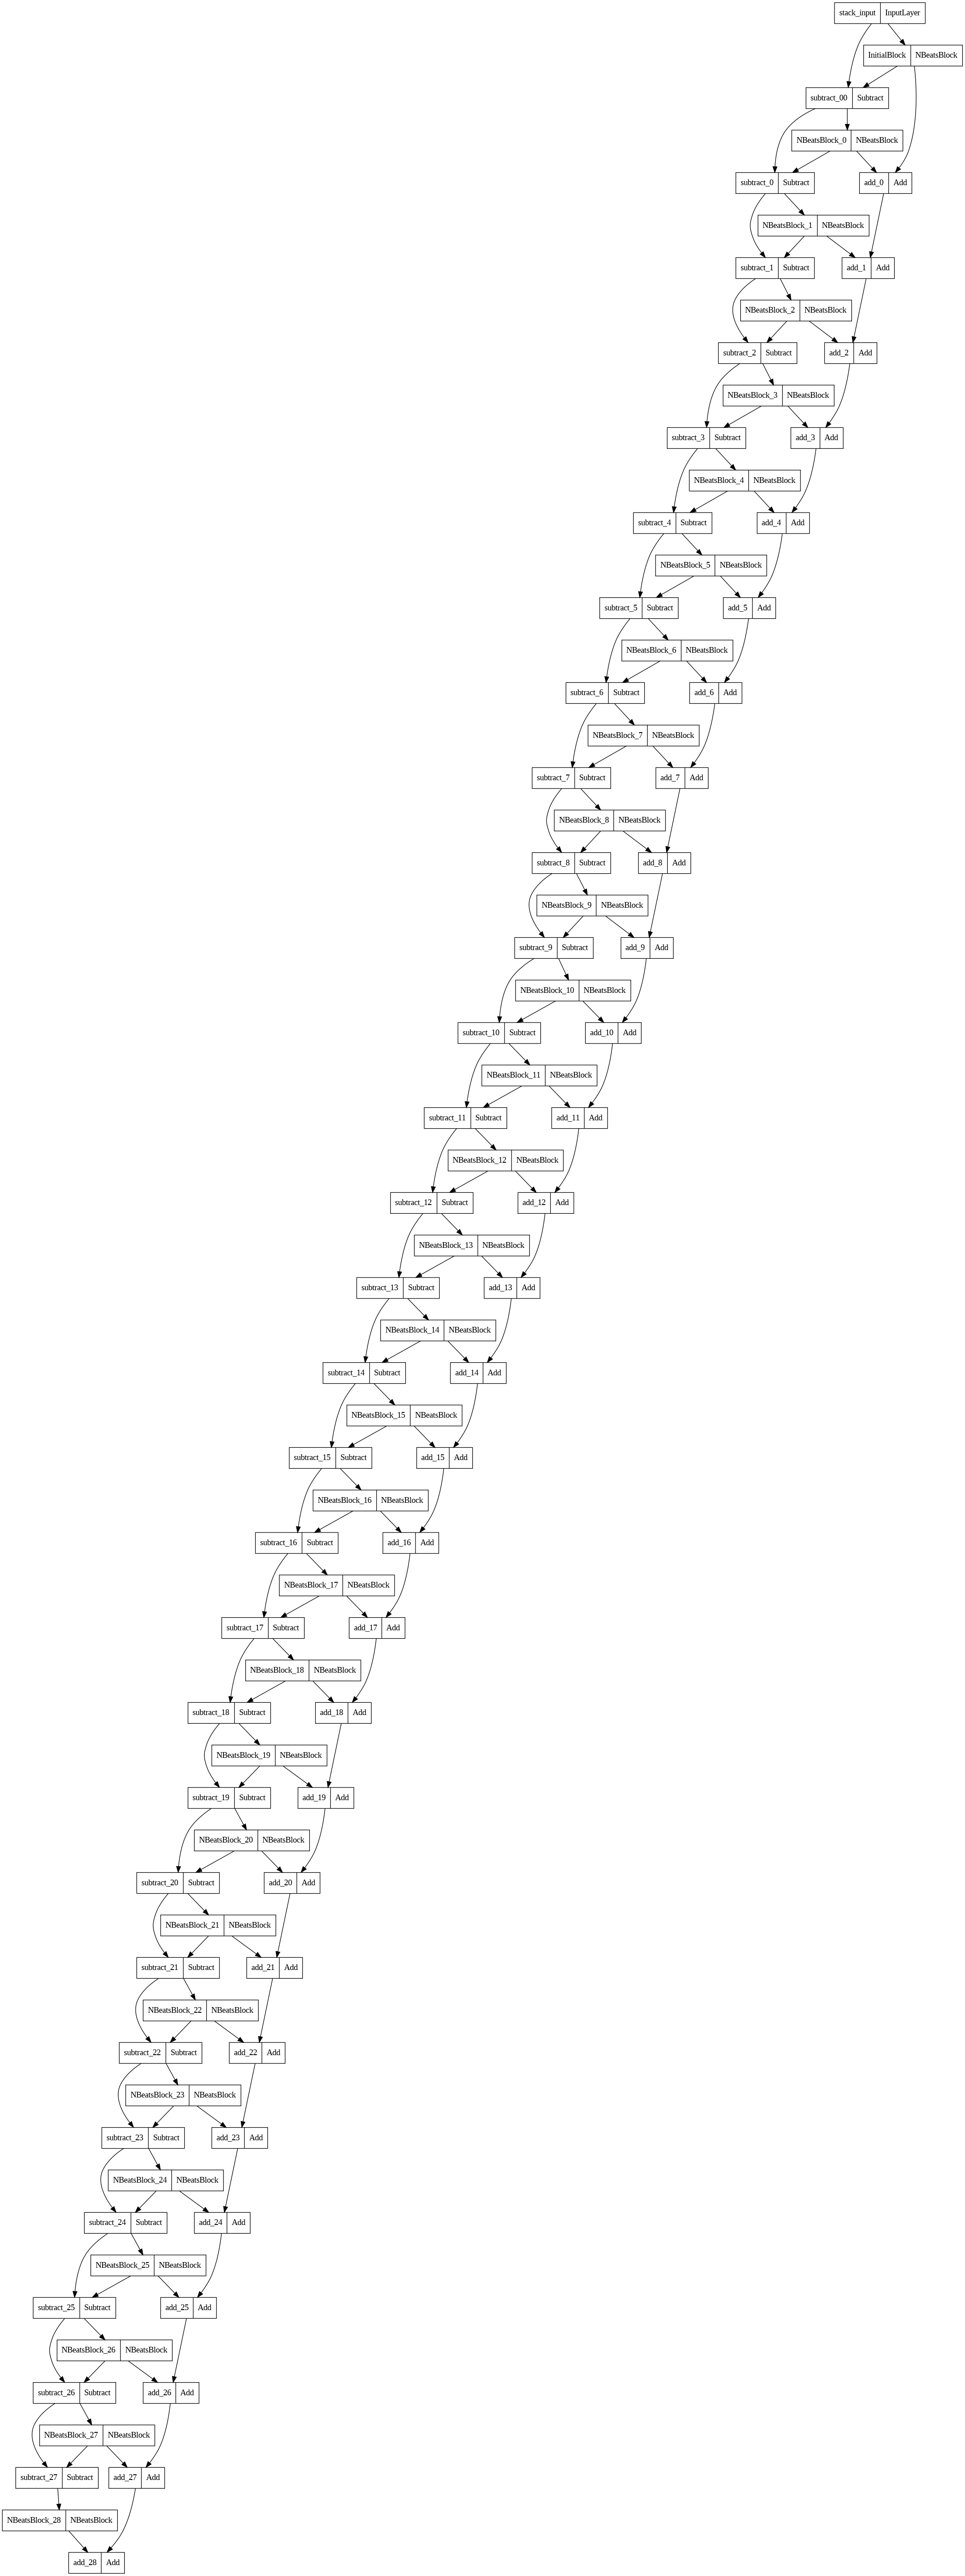

In [122]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## **Model 8:** Creating and ensemble

In the N-BEATS paper, they trained an ensemble of models (180 in total, see section 3.4) to achieve the results they did using a combination of:

- Different loss functions (sMAPE, MASE and MAPE)
- Different window sizes (2 x horizon, 3 x horizon, 4 x horizon...)

To create our ensemble models we're going to be using a combination of:

- Different loss functions (MAE, MSE, MAPE)
- Randomly initialized models

 Each layer in the ensemble models will be initialized with a random normal (Gaussian) distribution using He normal initialization.

In [124]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [125]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 273: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 946: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 600: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 700: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 145: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 661: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 761: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 594: ReduceLROnPl

In [126]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [127]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 50ms/step


<tf.Tensor: shape=(15, 365), dtype=float32, numpy=
array([[30322.46 , 30328.725, 30139.926, ..., 57742.082, 57178.31 ,
        57656.6  ],
       [30401.13 , 30300.387, 30206.432, ..., 57974.395, 57397.613,
        57842.44 ],
       [30386.713, 30288.238, 30139.242, ..., 57800.39 , 57182.383,
        57879.402],
       ...,
       [30506.332, 30240.994, 30202.176, ..., 57702.31 , 57378.105,
        57734.348],
       [30353.148, 30347.   , 30315.568, ..., 57766.42 , 57314.75 ,
        58143.64 ],
       [30388.816, 30294.709, 30192.457, ..., 57726.86 , 57471.145,
        57695.836]], dtype=float32)>

In [128]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 850.7315,
 'mse': 1769540.0,
 'rmse': 1330.2406,
 'mape': 1.6769739,
 'mase': 54.139793}

In [129]:
model_6_results

{'mae': 847.2446,
 'mse': 1795406.8,
 'rmse': 1339.9279,
 'mape': 1.6813796,
 'mase': 54.139793}

Logically the ensemble model should have worked better but we see our Model_6 i,e Multivariate time series model is performing the best till now.

### Plotting the prediction intervals (uncertainity estimates of our ensemble)

Our models till now are predicting single points.

Meaning, given a set of WINDOW_SIZE=7 values, the model will predict HORIZION=1.

But generally predicting range of values might be more helpful in the case of time series analysis.

For example, if a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD?

Knowing the range of values a model is predicting may help you make better decisions for your forecasts.

These kind of prediction ranges are called prediction intervals or uncertainty estimates. And they're often as important as the forecast itself.



In [130]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

We can use our plotting function as well as the matplotlib.pyplot.fill_between() method to shade in the space between the upper and lower bounds.

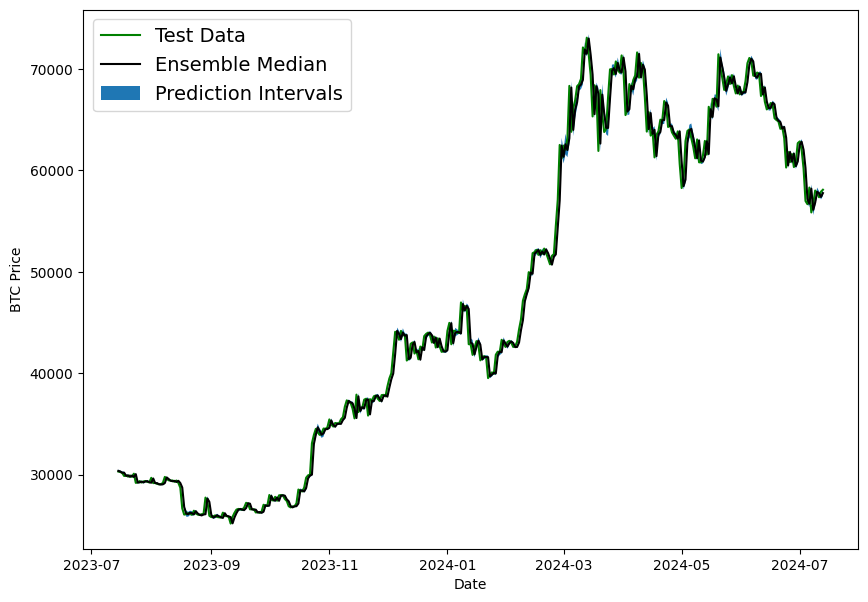

In [132]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=0
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

The graph is kind of not showing us what we wanted to see.

We can make a interactive graph using plotly.

## **Model 9:** Train a model on the full historical data to make predictions into future

In [135]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2019-07-13,11392.378906,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14,10256.058594,12.5,11392.378906,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-15,10895.089844,12.5,10256.058594,11392.378906,NaN,NaN,NaN,NaN,NaN
2019-07-16,9477.641602,12.5,10895.089844,10256.058594,11392.378906,NaN,NaN,NaN,NaN
2019-07-17,9693.802734,12.5,9477.641602,10895.089844,10256.058594,11392.378906,NaN,NaN,NaN


In [136]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [137]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [138]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

#### Making predictions on the future


In [139]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [140]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [141]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 144ms/step
Predicting on: 
 [55849.109375 56705.097656 58009.226563 57742.496094 57344.914063
 57899.464844 58087.300781] -> Prediction: 56693.37109375

1/1 [==============================] - 0s 37ms/step
Predicting on: 
 [56705.097656   58009.226563   57742.496094   57344.914063
 57899.464844   58087.300781   56693.37109375] -> Prediction: 57352.46484375

1/1 [==============================] - 0s 28ms/step
Predicting on: 
 [58009.226563   57742.496094   57344.914063   57899.464844
 58087.300781   56693.37109375 57352.46484375] -> Prediction: 57879.35546875

1/1 [==============================] - 0s 35ms/step
Predicting on: 
 [57742.496094   57344.914063   57899.464844   58087.300781
 56693.37109375 57352.46484375 57879.35546875] -> Prediction: 58043.9375

1/1 [==============================] - 0s 28ms/step
Predicting on: 
 [57344.914063   57899.464844   58087.300781   56693.37109375
 57352.46484375 57879.35546875 58043.9375    ] -> Prediction:

In [142]:
future_forecast[:10]

[56693.37,
 57352.465,
 57879.355,
 58043.938,
 57815.734,
 57805.633,
 57718.15,
 57251.133,
 57794.758,
 58076.0]